<a href="https://colab.research.google.com/github/fluderm/PyBulletPerAct/blob/main/create_and_save_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Save demo from Panda (compatible with RLBench and PyBulletPerAct):** 


### Install Dependencies

In [ ]:
%pip install setuptools==65.5.0 # Need to add this for panda-gym==2.0.0 to work
!apt install -y python-opengl ffmpeg > /dev/null 2>&1
%pip install pyvirtualdisplay

#stable_baselines3 sb3_contrib panda-gym==2.0.0 
!pip install pyvirtualdisplay 
!apt install xvfb python-opengl ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.0
    Uninstalling setuptools-67.6.0:
      Successfully uninstalled setuptools-67.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the 

### Clone Repo and Setup

This repo contains barebones code from [`panda_gym`](https://github.com/qgallouedec/panda-gym).


In [ ]:
!git clone https://github.com/fluderm/PyBulletPerAct.git
%pip install -e PyBulletPerAct

# copy glass files to current directory:

!cp PyBulletPerAct/panda_gym/plastic_coffee_cup.mtl \
 PyBulletPerAct/panda_gym/plastic_coffee_cup_vhacd.obj \
 PyBulletPerAct/panda_gym/plastic_coffee_cup.obj .

Cloning into 'PyBulletPerAct'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 93 (delta 11), reused 0 (delta 0), pack-reused 67
Unpacking objects: 100% (93/93), 120.20 KiB | 1.72 MiB/s, done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/PyBulletPerAct
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 MB 10.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gym
  Running setup.py clean for gym
Failed to build g

# Panda Gym

In [ ]:
import sys

sys.path.append('PyBulletPerAct')

In [ ]:
import gym

import panda_gym
import pprint
import numpy as np
import pybullet as p
import math

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1024, 768))
display.start()

from matplotlib import pyplot as plt, animation
%matplotlib inline
from IPython import display

def create_anim(frames, dpi, fps):
    plt.figure(figsize=(frames[0].shape[1] / dpi, frames[0].shape[0] / dpi), dpi=dpi)
    patch = plt.imshow(frames[0])
    def setup():
        plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])
    anim = animation.FuncAnimation(plt.gcf(), animate, init_func=setup, frames=len(frames), interval=fps)
    return anim

def display_anim(frames, dpi=72, fps=50):
    anim = create_anim(frames, dpi, fps)
    return anim.to_jshtml()

def save_anim(frames, filename, dpi=72, fps=50):
    anim = create_anim(frames, dpi, fps)
    anim.save(filename)


class trigger:
    def __init__(self):
        self._trigger = True

    def __call__(self, e):
        return self._trigger

    def set(self, t):
        self._trigger = t

Quick test if everything works:

{'observation': array([ 3.84396701e-02, -2.19447219e-12,  1.97400143e-01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.06685667e-01,
       -1.34727120e-01,  0.00000000e+00,  1.57079633e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00]), 'achieved_goal': array([ 3.84396701e-02, -2.19447219e-12,  1.97400143e-01]), 'desired_goal': array([-0.10668567, -0.13472712,  0.        ])}


/content/PyBulletPerAct/panda_gym/pybullet.py:926: UserWarning: The use of the render method is not recommended when the environment has not been created with render=True. The rendering will probably be weird. Prefer making the environment with option `render=True`. For example: `env = gym.make('PandaReach-v2', render=True)`.
  warnings.warn(
/content/PyBulletPerAct/panda_gym/pybullet.py:1003: UserWarning: The use of the render method is not recommended when the environment has not been created with render=True. The rendering will probably be weird. Prefer making the environment with option `render=True`. For example: `env = gym.make('PandaReach-v2', render=True)`.
  warnings.warn(


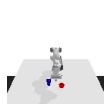

In [ ]:
#env.close()
env = gym.make('PandaPickAndPlace-v2',control_type='joints')
obs = env.reset()
env.robot.neutral_joint_values = np.array([0.00, 0.41, 0.00, -1.85, 3.14, 2.52, 0.79, 3.00, 3.00])
print(obs)

rgb, depth, mask, misc = env.render(mode = 'rgb_array')
display.HTML(display_anim([rgb['front']]))

In [ ]:
obs = env.reset()

# enable joint force sensor:

[(env.sim.physics_client.enableJointForceTorqueSensor(0,i)) for i in range(11)]

[None, None, None, None, None, None, None, None, None, None, None]

# Save panda dataset

## Some Utils

In [ ]:
import datetime as dt
from time import sleep

def no_disconnect():
  t = dt.datetime.now()

  while True:
      delta = dt.datetime.now()-t               
      if delta.seconds >= 60:
          print("1 Min",dt.datetime.now())
          t = dt.datetime.now()
      sleep(10)

In [ ]:
def _normalize(pc):
  return (pc - np.amin(pc)) / (np.amax(pc) - np.amin(pc))

In [ ]:
from multiprocessing import Process, Manager
import sys

sys.path.append('peract_colab')

import os
import pickle
from PIL import Image
import numpy as np

from absl import app
from absl import flags

In [ ]:
panda_dataset_dir = 'PyBulletPerAct/data'

def check_and_make(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)

check_and_make(panda_dataset_dir)

In [ ]:
def ClipFloatValues(float_array, min_value, max_value):
  """Clips values to the range [min_value, max_value].
  First checks if any values are out of range and prints a message.
  Then clips all values to the given range.
  Args:
    float_array: 2D array of floating point values to be clipped.
    min_value: Minimum value of clip range.
    max_value: Maximum value of clip range.
  Returns:
    The clipped array.
  """
  if float_array.min() < min_value or float_array.max() > max_value:
    float_array = np.clip(float_array, min_value, max_value)
  return float_array

DEFAULT_RGB_SCALE_FACTOR = 256000.0

def float_array_to_rgb_image(float_array,
                             scale_factor=DEFAULT_RGB_SCALE_FACTOR,
                             drop_blue=False):
  """Convert a floating point array of values to an RGB image.
  Convert floating point values to a fixed point representation where
  the RGB bytes represent a 24-bit integer.
  R is the high order byte.
  B is the low order byte.
  The precision of the depth image is 1/256 mm.
  Floating point values are scaled so that the integer values cover
  the representable range of depths.
  This image representation should only use lossless compression.
  Args:
    float_array: Input array of floating point depth values in meters.
    scale_factor: Scale value applied to all float values.
    drop_blue: Zero out the blue channel to improve compression, results in 1mm
      precision depth values.
  Returns:
    24-bit RGB PIL Image object representing depth values.
  """
  # Scale the floating point array.
  scaled_array = np.floor(float_array * scale_factor + 0.5)

  # Convert the array to integer type and clip to representable range.
  min_inttype = 0
  max_inttype = 2**24 - 1
  scaled_array = ClipFloatValues(scaled_array, min_inttype, max_inttype)
  int_array = scaled_array.astype(np.uint32)
  # Calculate:
  #   r = (f / 256) / 256  high byte
  #   g = (f / 256) % 256  middle byte
  #   b = f % 256          low byte
  rg = np.divide(int_array, 256)
  r = np.divide(rg, 256)
  g = np.mod(rg, 256)
  image_shape = int_array.shape
  rgb_array = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)
  rgb_array[..., 0] = r
  rgb_array[..., 1] = g
  if not drop_blue:
    # Calculate the blue channel and add it to the array.
    b = np.mod(int_array, 256)
    rgb_array[..., 2] = b
  image_mode = 'RGB'
  image = Image.fromarray(rgb_array, mode=image_mode)
  return image

In [ ]:
# function that transforms rotation 3x3 matrix to Euler angles:

# Within PyBullet can also do p.getMatrixFromQuaternion(com_o)

def rotationMatrixToEulerAngles(R) :
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    singular = sy < 1e-6
    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0
 
    return np.array([x, y, z])


In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as Rot

def cvK2BulletP(K, w, h, near, far):
    """
    cvKtoPulletP converst the K interinsic matrix as calibrated using Opencv
    and ROS to the projection matrix used in openGL and Pybullet.

    :param K:  OpenCV 3x3 camera intrinsic matrix
    :param w:  Image width
    :param h:  Image height
    :near:     The nearest objects to be included in the render
    :far:      The furthest objects to be included in the render
    :return:   4x4 projection matrix as used in openGL and pybullet
    """ 
    f_x = K[0,0]
    f_y = K[1,1]
    c_x = K[0,2]
    c_y = K[1,2]
    A = (near + far)/(near - far)
    B = 2 * near * far / (near - far)

    projection_matrix = [
                        [2/w * f_x,  0,          (w - 2*c_x)/w,  0],
                        [0,          2/h * f_y,  (2*c_y - h)/h,  0],
                        [0,          0,          A,              B],
                        [0,          0,          -1,             0]]
    #The transpose is needed for respecting the array structure of the OpenGL
    return np.array(projection_matrix).T.reshape(16).tolist()

def BulletP2cvK(proj_mat, w, h):
    # inverse of above
    A,B = proj_mat[2,2],proj_mat[3,2]
    n,f = B/(A-1), B/(A+1)
    fx,fy = w*proj_mat[0,0]/2,h*proj_mat[1,1]/2
    cx,cy = w*(1-proj_mat[2,0])/2, h*(proj_mat[2,1]+1)/2

    return np.array([[fx,0,cx],[0,fy,cy],[0,0,1]]), n, f


def cvPose2BulletView(Rt):
    """
    cvPose2BulletView gets orientation and position as used 
    in ROS-TF and opencv and coverts it to the view matrix used 
    in openGL and pyBullet.
    
    :param q: ROS orientation expressed as quaternion [qx, qy, qz, qw] 
    :param t: ROS postion expressed as [tx, ty, tz]
    :return:  4x4 view matrix as used in pybullet and openGL
    
    """

    #T = np.vstack([np.hstack([R, np.array(t).reshape(3,1)]),
                              #np.array([0, 0, 0, 1])])
    # Convert opencv convention to python convention
    # By a 180 degrees rotation along X
    Tc = np.array([[1,   0,    0,  0],
                   [0,  -1,    0,  0],
                   [0,   0,   -1,  0],
                   [0,   0,    0,  1]]).reshape(4,4)
    
    # pybullet pse is the inverse of the pose from the ROS-TF
    T=Tc@np.linalg.inv(Rt)
    # The transpose is needed for respecting the array structure of the OpenGL
    viewMatrix = T.T.reshape(16)
    return viewMatrix

def BullettocvPose(X):
    # inverse of above
    #T = np.vstack([np.hstack([R, np.array(t).reshape(3,1)]),
                              #np.array([0, 0, 0, 1])])
    # Convert opencv convention to python convention
    # By a 180 degrees rotation along X
    Tc = np.array([[1,   0,    0,  0],
                   [0,  -1,    0,  0],
                   [0,   0,   -1,  0],
                   [0,   0,    0,  1]]).reshape(4,4)
    
    # pybullet pse is the inverse of the pose from the ROS-TF
    T = np.linalg.inv(X.T)@Tc
    # The transpose is needed for respecting the array structure of the OpenGL
    #viewMatrix = T.T.reshape(16)
    return T


## Create Demo

### Define classes

Define classes as per [`YARR`](https://github.com/stepjam/YARR) and [`RLBench`](https://github.com/stepjam/RLBench)

In [ ]:
class Demo(object):

    def __init__(self, observations, random_seed=None):
        self._observations = observations
        self.random_seed = random_seed
        self.variation_number = 0

    def __len__(self):
        return len(self._observations)

    def __getitem__(self, i):
        return self._observations[i]

    def restore_state(self):
        np.random.set_state(self.random_seed)

In [ ]:
class Observation(object):
    """Storage for both visual and low-dimensional observations."""

    def __init__(self,
                 left_shoulder_rgb: np.ndarray,
                 left_shoulder_depth: np.ndarray,
                 left_shoulder_mask: np.ndarray,
                 left_shoulder_point_cloud: np.ndarray,
                 right_shoulder_rgb: np.ndarray,
                 right_shoulder_depth: np.ndarray,
                 right_shoulder_mask: np.ndarray,
                 right_shoulder_point_cloud: np.ndarray,
                 overhead_rgb: np.ndarray,
                 overhead_depth: np.ndarray,
                 overhead_mask: np.ndarray,
                 overhead_point_cloud: np.ndarray,
                 wrist_rgb: np.ndarray,
                 wrist_depth: np.ndarray,
                 wrist_mask: np.ndarray,
                 wrist_point_cloud: np.ndarray,
                 front_rgb: np.ndarray,
                 front_depth: np.ndarray,
                 front_mask: np.ndarray,
                 front_point_cloud: np.ndarray,
                 joint_velocities: np.ndarray,
                 joint_positions: np.ndarray,
                 joint_forces: np.ndarray,
                 gripper_open: float,
                 gripper_pose: np.ndarray,
                 gripper_matrix: np.ndarray,
                 gripper_joint_positions: np.ndarray,
                 gripper_touch_forces: np.ndarray,
                 task_low_dim_state: np.ndarray,
                 ignore_collisions: np.ndarray,
                 misc: dict):
        self.left_shoulder_rgb = left_shoulder_rgb
        self.left_shoulder_depth = left_shoulder_depth
        self.left_shoulder_mask = left_shoulder_mask
        self.left_shoulder_point_cloud = left_shoulder_point_cloud
        self.right_shoulder_rgb = right_shoulder_rgb
        self.right_shoulder_depth = right_shoulder_depth
        self.right_shoulder_mask = right_shoulder_mask
        self.right_shoulder_point_cloud = right_shoulder_point_cloud
        self.overhead_rgb = overhead_rgb
        self.overhead_depth = overhead_depth
        self.overhead_mask = overhead_mask
        self.overhead_point_cloud = overhead_point_cloud
        self.wrist_rgb = wrist_rgb
        self.wrist_depth = wrist_depth
        self.wrist_mask = wrist_mask
        self.wrist_point_cloud = wrist_point_cloud
        self.front_rgb = front_rgb
        self.front_depth = front_depth
        self.front_mask = front_mask
        self.front_point_cloud = front_point_cloud
        self.joint_velocities = joint_velocities
        self.joint_positions = joint_positions
        self.joint_forces = joint_forces
        self.gripper_open = gripper_open
        self.gripper_pose = gripper_pose
        self.gripper_matrix = gripper_matrix
        self.gripper_joint_positions = gripper_joint_positions
        self.gripper_touch_forces = gripper_touch_forces
        self.task_low_dim_state = task_low_dim_state
        self.ignore_collisions = ignore_collisions
        self.misc = misc

    def get_low_dim_data(self) -> np.ndarray:
        """Gets a 1D array of all the low-dimensional obseervations.
        :return: 1D array of observations.
        """
        low_dim_data = [] if self.gripper_open is None else [[self.gripper_open]]
        for data in [self.joint_velocities, self.joint_positions,
                     self.joint_forces,
                     self.gripper_pose, self.gripper_joint_positions,
                     self.gripper_touch_forces, self.task_low_dim_state]:
            if data is not None:
                low_dim_data.append(data)
        return np.concatenate(low_dim_data) if len(low_dim_data) > 0 else np.array([])

In [ ]:
from typing import Type

class ObservationElement(object):

    def __init__(self, name: str, shape: tuple, type: Type[np.dtype]):
        self.name = name
        self.shape = shape
        self.type = type

### Get Obs:

In [ ]:
def _normalize_fn(pc,far,near):
  return (pc-near)/(far-near)

In [ ]:
def get_observation(env) -> Observation:
    #tip = self.robot.arm.get_tip()
    _sim_pc = env.sim.physics_client
    _sim = env.sim

    panda_id = _sim._bodies_idx['panda']

    pos = np.array([_sim_pc.getJointState(panda_id,i)[0] \
            for i in range(7)])
    vels = np.array([_sim_pc.getJointState(panda_id,i)[1] \
            for i in range(7)])
    joint_forces = np.array([_sim_pc.getJointState(panda_id,i)[3] \
                    for i in range(7)])
    
    ee_forces_flat = np.array(_sim_pc.getJointState(panda_id,6)[2])

    rgb, depth, mask, cam_misc = env.render(mode = 'rgb_array')

    left_shoulder_rgb = rgb['left_shoulder']
    # adjust conventions
    far = cam_misc['left_shoulder']['far']
    near = cam_misc['left_shoulder']['near']
    left_shoulder_depth = (far*near)/(far-(far-near)*depth['left_shoulder'])
    # scale to be in [0,1]
    left_shoulder_depth = _normalize_fn(left_shoulder_depth,far,near)
    #
    left_shoulder_mask = mask['left_shoulder']

    right_shoulder_rgb = rgb['right_shoulder']
    # adjust conventions
    far = cam_misc['right_shoulder']['far']
    near = cam_misc['right_shoulder']['near']
    right_shoulder_depth = (far*near)/(far-(far-near)*depth['right_shoulder'])
    # scale to be in [0,1]
    right_shoulder_depth = _normalize_fn(right_shoulder_depth,far,near)
    #
    right_shoulder_mask = mask['right_shoulder']

    #overhead_rgb = 
    #overhead_depth = 
    #overhead_mask = 

    wrist_rgb = rgb['wrist']
    # adjust conventions
    far = cam_misc['wrist']['far']
    near = cam_misc['wrist']['near']
    wrist_depth = (far*near)/(far-(far-near)*depth['wrist'])
    # scale to be in [0,1]
    wrist_depth = _normalize_fn(wrist_depth,far,near)
    #
    wrist_mask = mask['wrist']
    
    front_rgb = rgb['front']
    # adjust conventions
    far = cam_misc['front']['far']
    near = cam_misc['front']['near']
    front_depth = (far*near)/(far-(far-near)*depth['front'])
    # scale to be in [0,1]
    front_depth = _normalize_fn(front_depth,far,near)
    #
    front_mask = mask['front']

    gripper_state = _sim_pc.getLinkState(0,11)
    gripper_pose = np.concatenate(gripper_state[:2])

    gripper_rot_mat = np.array(_sim_pc.getMatrixFromQuaternion(gripper_state[1])).reshape(-1,3)
    gripper_matrix = np.row_stack((np.column_stack((gripper_rot_mat,gripper_pose[:3])),np.array([0,0,0,1])))

    gripper_joint_pos = np.array([_sim_pc.getJointState(0, i)[0] for i in range(9,11)])

    glass_id = _sim._bodies_idx['object']
    cp9_glass = len(_sim_pc.getContactPoints(panda_id,glass_id, linkIndexA = 9))
    cp10_glass = len(_sim_pc.getContactPoints(panda_id,glass_id, linkIndexA = 10))
    ignore_collisions = np.array(1 if (cp9_glass>0 and cp10_glass>0) else 0)

    gripper_op = (1 if env.robot.get_fingers_width() > 0.09 else 0)
    cp9 = len(_sim_pc.getContactPoints(bodyA = panda_id, linkIndexA = 9))
    cp10 = len(_sim_pc.getContactPoints(bodyA = panda_id, linkIndexA = 9))
    gripper_with_obj = (1 if (cp9==0 and cp10==0) else 0)

    gripper_open = (1.0 if (gripper_op==1 and gripper_with_obj==1) else 0)

    obs = Observation(
        left_shoulder_rgb=left_shoulder_rgb,
        left_shoulder_depth=left_shoulder_depth,
        left_shoulder_point_cloud = None,
        right_shoulder_rgb=right_shoulder_rgb,
        right_shoulder_depth=right_shoulder_depth,
        right_shoulder_point_cloud= None,
        overhead_rgb = None, #overhead_rgb,
        overhead_depth = None, #overhead_depth,
        overhead_point_cloud = None, #overhead_pcd,
        wrist_rgb=wrist_rgb,
        wrist_depth=wrist_depth,
        wrist_point_cloud = None,
        front_rgb=front_rgb,
        front_depth=front_depth,
        front_point_cloud=None,
        left_shoulder_mask=left_shoulder_mask,
        right_shoulder_mask=right_shoulder_mask,
        overhead_mask= None, #overhead_mask,
        wrist_mask = wrist_mask,
        front_mask = front_mask,
        joint_velocities = vels,
        joint_positions = pos,
        joint_forces = joint_forces,
        gripper_open = gripper_open, 
        gripper_pose = gripper_pose,
        gripper_matrix = gripper_matrix,
        gripper_touch_forces = ee_forces_flat,
        gripper_joint_positions = gripper_joint_pos,
        task_low_dim_state = get_low_dim_state(env),
        ignore_collisions = ignore_collisions, # get correct object
        misc=_get_misc(cam_misc))#self._get_misc(),)
    return obs


def get_low_dim_state(env) -> np.ndarray:
    """Gets the pose and various other properties of objects in the task.
    :return: 1D array of low-dimensional task state.
    """

    # Corner cases:
    # (1) Object has been deleted.
    # (2) Object has been grasped (and is now child of gripper).

    state = []
    '''
    for obj, objtype in self._initial_objs_in_scene:
        if not obj.still_exists():
            # It has been deleted
            empty_len = 7
            if objtype == ObjectType.JOINT:
                empty_len += 1
            elif objtype == ObjectType.FORCE_SENSOR:
                empty_len += 6
            state.extend(np.zeros((empty_len,)).tolist())
        else:
            state.extend(np.array(obj.get_pose()))
            if obj.get_type() == ObjectType.JOINT:
                state.extend([Joint(obj.get_handle()).get_joint_position()])
            elif obj.get_type() == ObjectType.FORCE_SENSOR:
                forces, torques = ForceSensor(obj.get_handle()).read()
                state.extend(forces + torques)
    '''
    # might include panda also, not sure -- don't think it matters.
    for obj in env.sim._bodies_idx.keys():
      if obj=='panda':
        continue
      else:
        state.extend(np.array(get_pose(env,obj)))

    return np.array(state).flatten()

def get_pose(env,body) -> np.ndarray:
    """Retrieves the position and quaternion of an object
    :param relative_to: Indicates relative to which reference frame we want
        the pose. Specify None to retrieve the absolute pose, or an Object
        relative to whose reference frame we want the pose.
    :return: An array containing the (X,Y,Z,Qx,Qy,Qz,Qw) pose of
        the object.
    """
    position,quaternion = env.sim.physics_client.getBasePositionAndOrientation(env.sim._bodies_idx[body])
    return np.r_[position, quaternion]


def _get_misc(misc_cam):
    def _get_cam_data(misc_cam,name):
        mc = misc_cam[name]
        w,h = mc['width'], mc['height']
        extrinsic = BullettocvPose(mc['view'])
        intrinsic = BulletP2cvK(mc['proj'], w, h)[0]
        
        d = {
            '%s_camera_extrinsics' % name: extrinsic,
            '%s_camera_intrinsics' % name: intrinsic,
            '%s_camera_near' % name: mc['near'],
            '%s_camera_far' % name: mc['far'],
        }
        return d
    misc = _get_cam_data(misc_cam, 'left_shoulder')
    misc.update(_get_cam_data(misc_cam, 'right_shoulder'))
    #misc.update(_get_cam_data(self._cam_overhead, 'overhead_camera'))
    misc.update(_get_cam_data(misc_cam, 'front'))
    misc.update(_get_cam_data(misc_cam, 'wrist'))
    return misc

## Save Demo

In [ ]:
IMAGE_FORMAT = '%d.png'

LEFT_SHOULDER_RGB_FOLDER = 'left_shoulder_rgb'
LEFT_SHOULDER_DEPTH_FOLDER = 'left_shoulder_depth'
LEFT_SHOULDER_MASK_FOLDER = 'left_shoulder_mask'
RIGHT_SHOULDER_RGB_FOLDER = 'right_shoulder_rgb'
RIGHT_SHOULDER_DEPTH_FOLDER = 'right_shoulder_depth'
RIGHT_SHOULDER_MASK_FOLDER = 'right_shoulder_mask'
OVERHEAD_RGB_FOLDER = 'overhead_rgb'
OVERHEAD_DEPTH_FOLDER = 'overhead_depth'
OVERHEAD_MASK_FOLDER = 'overhead_mask'
WRIST_RGB_FOLDER = 'wrist_rgb'
WRIST_DEPTH_FOLDER = 'wrist_depth'
WRIST_MASK_FOLDER = 'wrist_mask'
FRONT_RGB_FOLDER = 'front_rgb'
FRONT_DEPTH_FOLDER = 'front_depth'
FRONT_MASK_FOLDER = 'front_mask'
EPISODES_FOLDER = 'episodes'
EPISODE_FOLDER = 'episode%d'
VARIATIONS_FOLDER = 'variation%d'

LOW_DIM_PICKLE = 'low_dim_obs.pkl'
VARIATION_DESCRIPTIONS = 'variation_descriptions.pkl'

TTT_FILE = 'task_design.ttt'

DEPTH_SCALE = 2**24 - 1

In [ ]:
def save_demo(demo, example_path):
    # Save image data first, and then None the image data, and pickle
    left_shoulder_rgb_path = os.path.join(
        example_path, LEFT_SHOULDER_RGB_FOLDER)
    left_shoulder_depth_path = os.path.join(
        example_path, LEFT_SHOULDER_DEPTH_FOLDER)
    left_shoulder_mask_path = os.path.join(
        example_path, LEFT_SHOULDER_MASK_FOLDER)
    right_shoulder_rgb_path = os.path.join(
        example_path, RIGHT_SHOULDER_RGB_FOLDER)
    right_shoulder_depth_path = os.path.join(
        example_path, RIGHT_SHOULDER_DEPTH_FOLDER)
    right_shoulder_mask_path = os.path.join(
        example_path, RIGHT_SHOULDER_MASK_FOLDER)
    #overhead_rgb_path = os.path.join(
    #    example_path, OVERHEAD_RGB_FOLDER)
    #overhead_depth_path = os.path.join(
    #    example_path, OVERHEAD_DEPTH_FOLDER)
    #overhead_mask_path = os.path.join(
    #    example_path, OVERHEAD_MASK_FOLDER)
    wrist_rgb_path = os.path.join(example_path, WRIST_RGB_FOLDER)
    wrist_depth_path = os.path.join(example_path, WRIST_DEPTH_FOLDER)
    wrist_mask_path = os.path.join(example_path, WRIST_MASK_FOLDER)
    front_rgb_path = os.path.join(example_path, FRONT_RGB_FOLDER)
    front_depth_path = os.path.join(example_path, FRONT_DEPTH_FOLDER)
    front_mask_path = os.path.join(example_path, FRONT_MASK_FOLDER)

    check_and_make(left_shoulder_rgb_path)
    check_and_make(left_shoulder_depth_path)
    check_and_make(left_shoulder_mask_path)
    check_and_make(right_shoulder_rgb_path)
    check_and_make(right_shoulder_depth_path)
    check_and_make(right_shoulder_mask_path)
    #check_and_make(overhead_rgb_path)
    #check_and_make(overhead_depth_path)
    #check_and_make(overhead_mask_path)
    check_and_make(wrist_rgb_path)
    check_and_make(wrist_depth_path)
    check_and_make(wrist_mask_path)
    check_and_make(front_rgb_path)
    check_and_make(front_depth_path)
    check_and_make(front_mask_path)

    for i, obs in enumerate(demo):
        left_shoulder_rgb = Image.fromarray(obs.left_shoulder_rgb)
        left_shoulder_depth = float_array_to_rgb_image(
            obs.left_shoulder_depth, scale_factor=DEPTH_SCALE)
        left_shoulder_mask = Image.fromarray(
            (obs.left_shoulder_mask * 255).astype(np.uint8))
        right_shoulder_rgb = Image.fromarray(obs.right_shoulder_rgb)
        right_shoulder_depth = float_array_to_rgb_image(
            obs.right_shoulder_depth, scale_factor=DEPTH_SCALE)
        right_shoulder_mask = Image.fromarray(
            (obs.right_shoulder_mask * 255).astype(np.uint8))
        #overhead_rgb = Image.fromarray(obs.overhead_rgb)
        #overhead_depth = float_array_to_rgb_image(
        #    obs.overhead_depth, scale_factor=DEPTH_SCALE)
        #overhead_mask = Image.fromarray(
        #    (obs.overhead_mask * 255).astype(np.uint8))
        wrist_rgb = Image.fromarray(obs.wrist_rgb)
        wrist_depth = float_array_to_rgb_image(
            obs.wrist_depth, scale_factor=DEPTH_SCALE)
        wrist_mask = Image.fromarray((obs.wrist_mask * 255).astype(np.uint8))
        front_rgb = Image.fromarray(obs.front_rgb)
        front_depth = float_array_to_rgb_image(
            obs.front_depth, scale_factor=DEPTH_SCALE)
        front_mask = Image.fromarray((obs.front_mask * 255).astype(np.uint8))

        left_shoulder_rgb.save(
            os.path.join(left_shoulder_rgb_path, IMAGE_FORMAT % i))
        left_shoulder_depth.save(
            os.path.join(left_shoulder_depth_path, IMAGE_FORMAT % i))
        left_shoulder_mask.save(
            os.path.join(left_shoulder_mask_path, IMAGE_FORMAT % i))
        right_shoulder_rgb.save(
            os.path.join(right_shoulder_rgb_path, IMAGE_FORMAT % i))
        right_shoulder_depth.save(
            os.path.join(right_shoulder_depth_path, IMAGE_FORMAT % i))
        right_shoulder_mask.save(
            os.path.join(right_shoulder_mask_path, IMAGE_FORMAT % i))
        #overhead_rgb.save(
        #    os.path.join(overhead_rgb_path, IMAGE_FORMAT % i))
        #overhead_depth.save(
        #    os.path.join(overhead_depth_path, IMAGE_FORMAT % i))
        #overhead_mask.save(
        #    os.path.join(overhead_mask_path, IMAGE_FORMAT % i))
        wrist_rgb.save(os.path.join(wrist_rgb_path, IMAGE_FORMAT % i))
        wrist_depth.save(os.path.join(wrist_depth_path, IMAGE_FORMAT % i))
        wrist_mask.save(os.path.join(wrist_mask_path, IMAGE_FORMAT % i))
        front_rgb.save(os.path.join(front_rgb_path, IMAGE_FORMAT % i))
        front_depth.save(os.path.join(front_depth_path, IMAGE_FORMAT % i))
        front_mask.save(os.path.join(front_mask_path, IMAGE_FORMAT % i))

        # We save the images separately, so set these to None for pickling.
        obs.left_shoulder_rgb = None
        obs.left_shoulder_depth = None
        obs.left_shoulder_point_cloud = None
        obs.left_shoulder_mask = None
        obs.right_shoulder_rgb = None
        obs.right_shoulder_depth = None
        obs.right_shoulder_point_cloud = None
        obs.right_shoulder_mask = None
        #obs.overhead_rgb = None
        #obs.overhead_depth = None
        #obs.overhead_point_cloud = None
        #obs.overhead_mask = None
        obs.wrist_rgb = None
        obs.wrist_depth = None
        obs.wrist_point_cloud = None
        obs.wrist_mask = None
        obs.front_rgb = None
        obs.front_depth = None
        obs.front_point_cloud = None
        obs.front_mask = None

    # Save the low-dimension data
    with open(os.path.join(example_path, LOW_DIM_PICKLE), 'wb') as f:
        pickle.dump(demo, f)

In [ ]:
EPISODE_FOLDER = 'episode%d'

CAMERA_FRONT = 'front'
CAMERA_LS = 'left_shoulder'
CAMERA_RS = 'right_shoulder'
CAMERA_WRIST = 'wrist'
CAMERAS = [CAMERA_FRONT, CAMERA_LS, CAMERA_RS, CAMERA_WRIST]

IMAGE_RGB = 'rgb'
IMAGE_DEPTH = 'depth'
IMAGE_TYPES = [IMAGE_RGB, IMAGE_DEPTH]
IMAGE_FORMAT  = '%d.png'
LOW_DIM_PICKLE = 'low_dim_obs.pkl'

def check_demo(data_path, index):
  episode_path = os.path.join(data_path, EPISODE_FOLDER % index)
  
  # low dim pickle file
  with open(os.path.join(episode_path, LOW_DIM_PICKLE), 'rb') as f:
    obs = pickle.load(f)
  
  num_steps = len(obs)
  for i in range(num_steps):
    front_rgb = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_FRONT, IMAGE_RGB), IMAGE_FORMAT % i))
    left_shoulder_rgb = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_LS, IMAGE_RGB), IMAGE_FORMAT % i))
    right_shoulder_rgb = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_RS, IMAGE_RGB), IMAGE_FORMAT % i))
    wrist_rgb = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_WRIST, IMAGE_RGB), IMAGE_FORMAT % i))

    front_depth = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_FRONT, IMAGE_DEPTH), IMAGE_FORMAT % i))
    left_shoulder_depth = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_LS, IMAGE_DEPTH), IMAGE_FORMAT % i))
    right_shoulder_depth = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_RS, IMAGE_DEPTH), IMAGE_FORMAT % i))
    wrist_depth = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_WRIST, IMAGE_DEPTH), IMAGE_FORMAT % i))

    front_pc = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_FRONT, IMAGE_DEPTH), IMAGE_FORMAT % i))
    left_shoulder_pc = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_LS, IMAGE_DEPTH), IMAGE_FORMAT % i))
    right_shoulder_pc = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_RS, IMAGE_DEPTH), IMAGE_FORMAT % i))
    wrist_pc = os.path.isfile(os.path.join(episode_path, '%s_%s' % (CAMERA_WRIST, IMAGE_DEPTH), IMAGE_FORMAT % i))

    # mask not necessary for PyBulletPerAct but might be for other applications.
    
    tot = [front_rgb,left_shoulder_rgb,right_shoulder_rgb,wrist_rgb,\
           front_depth,left_shoulder_depth,right_shoulder_depth,wrist_depth,\
           front_pc,left_shoulder_pc,right_shoulder_pc,wrist_pc]

    if not all(tot):
      return False, i

  return True, -1

Let's do a quick check for storing pointclouds:

In [ ]:
test_obs = get_observation(env)

/content/PyBulletPerAct/panda_gym/pybullet.py:926: UserWarning: The use of the render method is not recommended when the environment has not been created with render=True. The rendering will probably be weird. Prefer making the environment with option `render=True`. For example: `env = gym.make('PandaReach-v2', render=True)`.
  warnings.warn(
/content/PyBulletPerAct/panda_gym/pybullet.py:1003: UserWarning: The use of the render method is not recommended when the environment has not been created with render=True. The rendering will probably be weird. Prefer making the environment with option `render=True`. For example: `env = gym.make('PandaReach-v2', render=True)`.
  warnings.warn(


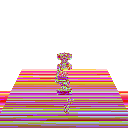

In [ ]:
float_array_to_rgb_image(test_obs.front_depth, scale_factor=DEPTH_SCALE)

## Create Demo


### Some basic utils for panda control

In [ ]:
def distance(x,y):
  return (np.sum((x-y)**2))

def approach_target(goal, from_side = True, ornt = np.array([1.0,0.0,0.0,0.0]), grip = 0, max_steps = 50, precision = 0.001):

  tot_obs=[]
  ee_position = env.robot.get_ee_position()
  steps=0
  
  while np.sqrt(distance(goal,ee_position)) > precision and steps<max_steps:

    multiplier = 5.0 if distance(goal,ee_position)>0.005 else 10.0
    ee_displacement = multiplier * (goal - ee_position)
    target_ee_position = ee_position + ee_displacement
    target_ee_position[2] = np.max((0, target_ee_position[2]))

    if from_side:
      ornt = np.array([-0.07942096,  0.72870646, -0.00803236,  0.68015784]) #np.array(p.getQuaternionFromEuler([math.pi,-math.pi/2,0]))

    target_arm_angles = env.robot.inverse_kinematics(link=11, \
                                                      position = target_ee_position, \
                                                      orientation = ornt
                                                      )
    target_arm_angles = target_arm_angles[:7]

    action = target_arm_angles - np.array([env.robot.get_joint_angle(joint=i) for i in range(7)])
    action = np.concatenate((action, [grip]))

    current_obs = get_observation(env)
    tot_obs.append(current_obs)

    _, _, _, _ = env.step(action)
    ee_position = env.robot.get_ee_position()
    steps+=1
  
  current_obs = get_observation(env)
  tot_obs.append(current_obs)
  
  print(steps)
  return tot_obs

def close_gripper():
  tot_obs=[]

  for _ in range(15):
    action = np.concatenate(([0,0,0,0,0,0,0], [-1]))
    current_obs = get_observation(env)
    tot_obs.append(current_obs)

    _,_,_,_ = env.step(action)
  
  current_obs = get_observation(env)
  tot_obs.append(current_obs)

  return tot_obs

def pour(angle_shift = 0, right = True):
  tot_obs=[]
  og_angle = env.sim.physics_client.getJointState(0,6)[0]#starting angle is at math.pi/4 
  angle = env.sim.physics_client.getJointState(0,6)[0]
  steps = 0
  action = (np.concatenate(([0,0,0,0,0,0,-1], [-1])) if right else np.concatenate(([0,0,0,0,0,0,1], [-1])))
  if not right: # only right=false works reliably
    while og_angle+angle_shift > angle: 
      current_obs = get_observation(env)
      tot_obs.append(current_obs)

      _, _, _, _ = env.step(action)
      angle = env.sim.physics_client.getJointState(0,6)[0]
      steps +=1
  else:
    while og_angle-angle_shift < angle:
      current_obs = get_observation(env)
      tot_obs.append(current_obs)

      _, _, _, _ = env.step(action)
      angle = env.sim.physics_client.getJointState(0,6)[0]
      steps +=1
    
    #last obs
    current_obs = get_observation(env)
    tot_obs.append(current_obs)

    _, _, _, _ = env.step(action)
    angle = env.sim.physics_client.getJointState(0,6)[0]
    steps +=1
  
  current_obs = get_observation(env)
  tot_obs.append(current_obs)
  print(steps)
  return tot_obs

def count_nr_in_tg(env):
  obj=env.sim.get_base_position('object')
  tg=env.sim.get_base_position('target')

  nr_in_tg=0
  nr_in_obj = 0
  nr_in_tbl = 0
  dist=[]

  for i in range(env.task.sph):
      for j in range(env.task.sph):
          for k in range(env.task.sph):
              pos = env.sim.get_base_position('s'+str(i)+str(j)+str(k))
              
              dist.append((np.sqrt(distance(pos,tg)),np.sqrt(distance(pos,obj))))
              #if np.sqrt(distance(pos,tg)) > 0.02 and np.sqrt(distance(pos,obj)) > 0.02:
              if pos[2]>0.01:
                  nr_in_obj+=1
              elif np.sqrt(distance(pos[:2],tg[:2])) < 0.055:
                  nr_in_tg+=1
              else:
                  nr_in_tbl+=1

  return nr_in_tg, nr_in_obj, nr_in_tbl, dist

In [ ]:
#env.close()
env = gym.make('PandaPickAndPlace-v2',control_type='joints')
obs = env.reset()

env.robot.neutral_joint_values = np.array([0.00, 0.41, 0.00, -1.85, 3.14, 2.52, 0.79, 3.00, 3.00])
[(env.sim.physics_client.enableJointForceTorqueSensor(0,i)) for i in range(11)];

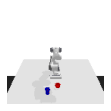

In [ ]:
obs = env.reset()
rgb, depth, mask, misc = env.render(mode = 'rgb_array')
display.HTML(display_anim([rgb['front']]));

### Basic example for "pick, place and pour"

In [ ]:
from matplotlib import pyplot as plt
from IPython import display

----- 0 -----
6
-----
50
-----
50
-----
12
-----
24
-----
Final distance between blue and red cup: 0.169m
visual check final frame:


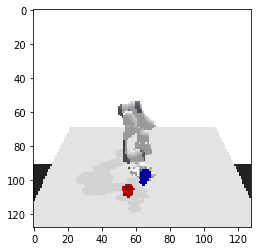

----- 1 -----
8
-----
50
-----
50
-----
12
-----
50
-----
Final distance between blue and red cup: 0.207m
visual check final frame:


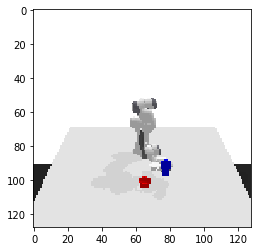

----- 2 -----
26
-----
50
-----
50
-----
15
-----
18
-----
Final distance between blue and red cup: 0.170m
visual check final frame:


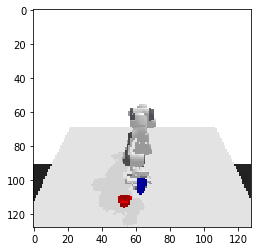

----- 3 -----
17
-----
50
-----
50
-----
15
-----
50
-----
Final distance between blue and red cup: 0.213m
visual check final frame:


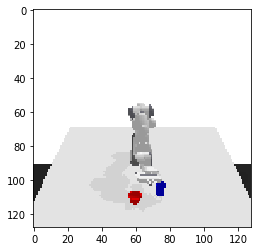

----- 4 -----
40
-----
50
-----
50
-----
16
-----
21
-----
Final distance between blue and red cup: 0.170m
visual check final frame:


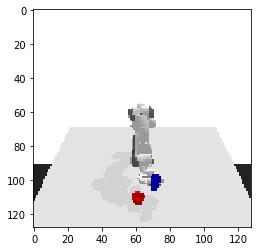

----- 5 -----
8
-----
50
-----
50
-----
13
-----
28
-----
Final distance between blue and red cup: 0.168m
visual check final frame:


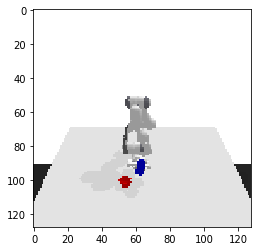

----- 6 -----
23
-----
50
-----
50
-----
13
-----
50
-----
Final distance between blue and red cup: 0.172m
visual check final frame:


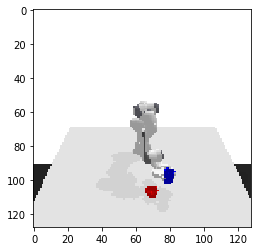

----- 7 -----
6
-----
50
-----
50
-----
10
-----
50
-----
Final distance between blue and red cup: 0.457m
visual check final frame:


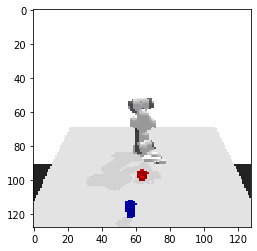

----- 8 -----
4
-----
47
-----
50
-----
12
-----
25
-----
Final distance between blue and red cup: 0.170m
visual check final frame:


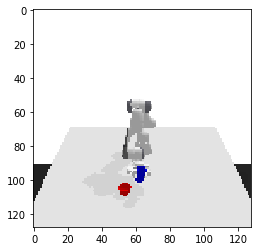

----- 9 -----
32
-----
50
-----
50
-----
17
-----
19
-----
Final distance between blue and red cup: 0.241m
visual check final frame:


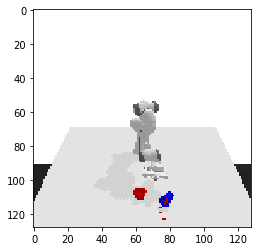

----- 10 -----
7
-----
35
-----
50
-----
12
-----
50
-----
Final distance between blue and red cup: 0.170m
visual check final frame:


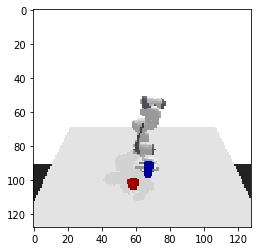

----- 11 -----
5
-----
50
-----
50
-----
11
-----
50
-----
Final distance between blue and red cup: 0.556m
visual check final frame:


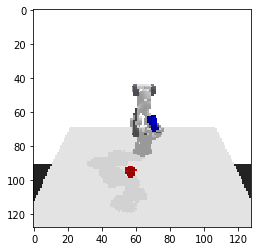

----- 12 -----
5
-----
50
-----
50
-----
12
-----
50
-----
Final distance between blue and red cup: 0.297m
visual check final frame:


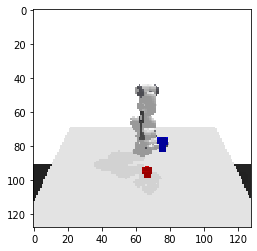

----- 13 -----
42
-----
50
-----
50
-----
16
-----
50
-----
Final distance between blue and red cup: 0.169m
visual check final frame:


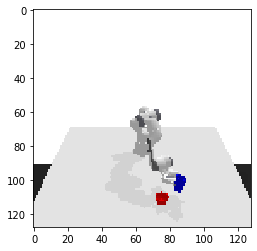

----- 14 -----
50
-----
50
-----
50
-----
17
-----
23
-----
Final distance between blue and red cup: 0.167m
visual check final frame:


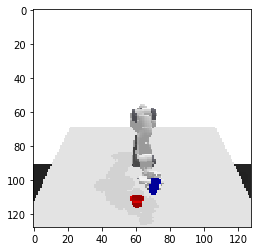

----- 15 -----
18
-----
50
-----
50
-----
15
-----
50
-----
Final distance between blue and red cup: 0.169m
visual check final frame:


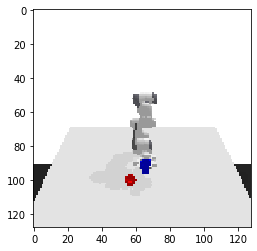

----- 16 -----
9
-----
50
-----
50
-----
12
-----
50
-----
Final distance between blue and red cup: 0.178m
visual check final frame:


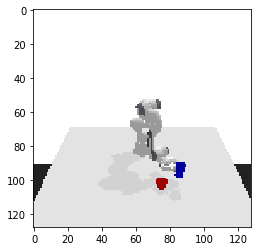

----- 17 -----
10
-----
50
-----
50
-----
8
-----
50
-----
Final distance between blue and red cup: 0.380m
visual check final frame:


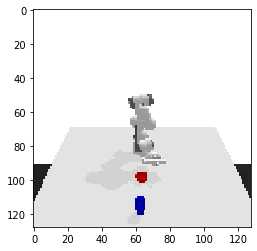

----- 18 -----
42
-----
50
-----
50
-----
18
-----
50
-----
Final distance between blue and red cup: 0.171m
visual check final frame:


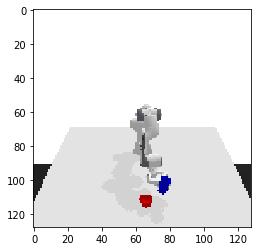

----- 19 -----
8
-----
50
-----
50
-----
11
-----
50
-----
Final distance between blue and red cup: 0.651m
visual check final frame:


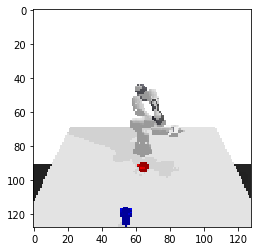

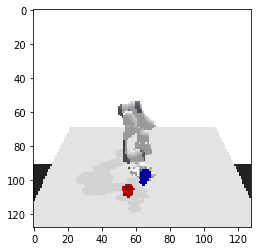

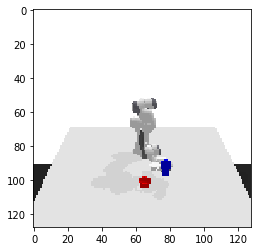

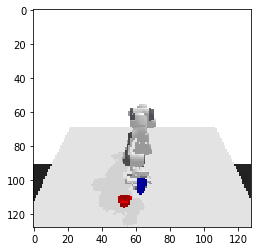

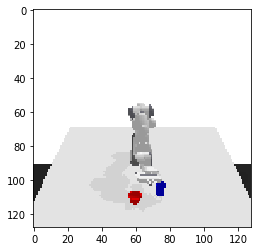

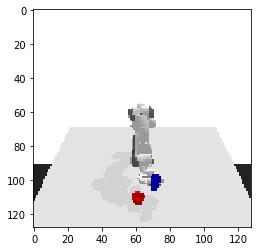

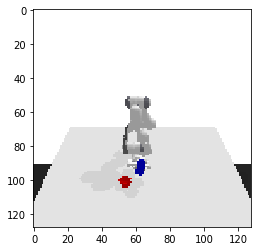

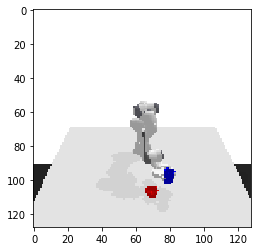

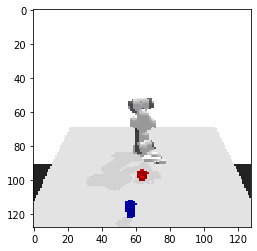

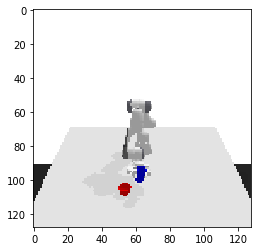

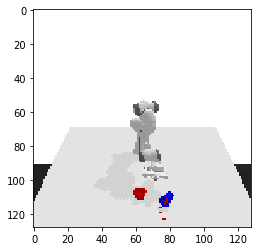

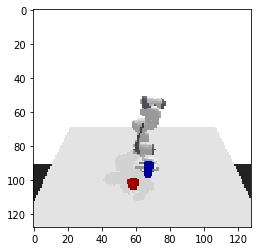

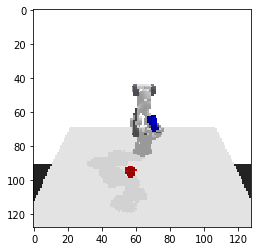

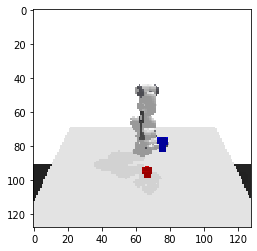

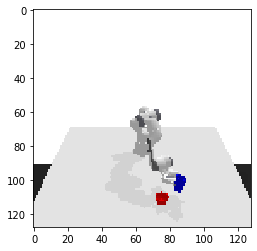

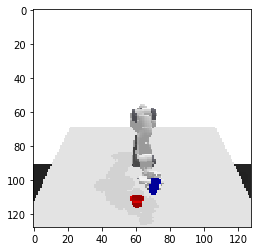

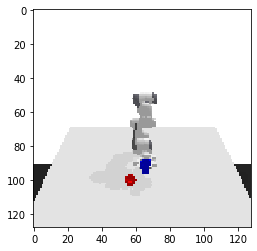

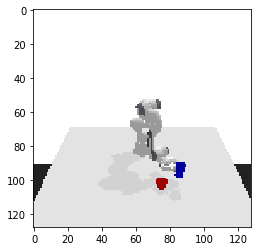

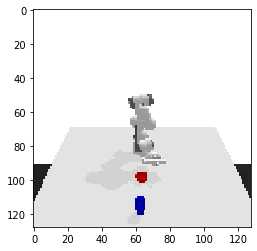

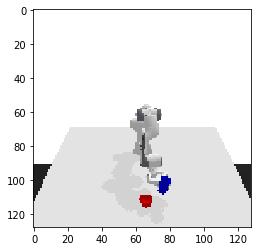

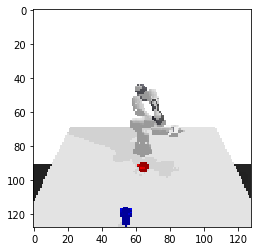

In [ ]:
# Example of picking up the blue cup and putting it above (to the left) of the red one:

i=0
while i<20:
    obs = env.reset()
    og_ee_pos = env.robot.get_ee_position()
    ee_position = env.robot.get_ee_position()

    obs = []

    print('-----',i,'-----')
    goal = env.sim.get_base_position("object") - np.array([0.08,0.0,0])
    goal = np.concatenate((goal[:2],[og_ee_pos[2]]))

    obs+=(approach_target(goal, from_side = True, grip = 1, precision = 0.04))

    print('-----')
    goal = np.concatenate((goal[:2],[env.sim.get_base_position("object")[2]]))
    obs+=(approach_target(goal, from_side = True, grip = 1, precision = 0.04))

    print('-----')
    goal = env.sim.get_base_position("object") + np.array([0.04,0,0.0175])
    obs+=(approach_target(goal, from_side = True, grip = 0, precision = 0.01))

    print('-----')
    goal = goal+np.array([0,0,0.25])
    obs+=(approach_target(goal, from_side = True, grip = -1, precision = 0.04))

    #print('-----')
    #goal = env.sim.get_base_position("target") 
    #obs+=(approach_target(goal, from_side = True, grip = -1))

    print('-----')
    goal = env.sim.get_base_position("target") + np.array([0,0,0.16])
    #if goal[1]>env.sim.get_base_position("object")[1]:
    #  offset = np.array([0,-0.02,0])
    #  right = False 
    #else:
    #  offset = np.array([0,0.02,0])
    #  right = True 

    right = False
    offset = np.array([0,0.12,0])

    goal+=offset
    obs+=(approach_target(goal, from_side = True, grip = -1,precision = 0.001))

    print('-----')

    # if you want to include the pouring action:
    #obs+=pour(angle_shift=math.pi/2 + math.pi/2*(0.3),right = right)
    #print('-----')
    #obs+=pour(angle_shift=math.pi/2 + math.pi/8*(0.3),right = not right)

    #count nr in red, blue or spilled:
    #_,_,_,dd=count_nr_in_tg(env)
    #print(count_nr_in_tg(env)[:3])

    final_dist_= np.sqrt(distance(env.sim.get_base_position("target"),env.sim.get_base_position("object")))
    print(f'Final distance between blue and red cup: {final_dist_:.3f}m')
    print('visual check final frame:')
    fig = plt.figure()
    plt.imshow(obs[-1].front_rgb, interpolation='nearest')
    display.display(fig)

    panda_demo = Demo(obs)
    EPISODE_FOLDER = 'episode%d'
    index = i
    panda_dataset_dir_eps = os.path.join(panda_dataset_dir, EPISODE_FOLDER % index)
    if os.path.exists(panda_dataset_dir_eps):
      !rm -rf $panda_dataset_dir_eps
      
    save_demo(panda_demo, panda_dataset_dir_eps)

    check_save = check_demo(panda_dataset_dir, index)
    if check_save:
      i+=1




----- 19 -----


/content/PyBulletPerAct/panda_gym/pybullet.py:926: UserWarning: The use of the render method is not recommended when the environment has not been created with render=True. The rendering will probably be weird. Prefer making the environment with option `render=True`. For example: `env = gym.make('PandaReach-v2', render=True)`.
  warnings.warn(
/content/PyBulletPerAct/panda_gym/pybullet.py:1003: UserWarning: The use of the render method is not recommended when the environment has not been created with render=True. The rendering will probably be weird. Prefer making the environment with option `render=True`. For example: `env = gym.make('PandaReach-v2', render=True)`.
  warnings.warn(


44
-----
50
-----
50
-----
50
-----
50
-----
Final distance between blue and red cup: 0.211m
visual check final frame:


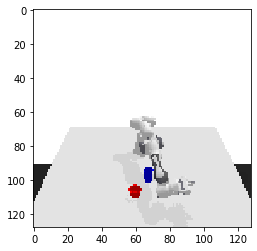

----- 17 -----
26
-----
50
-----
50
-----
14
-----
50
-----
Final distance between blue and red cup: 0.174m
visual check final frame:


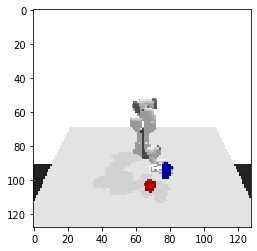

----- 11 -----
23
-----
50
-----
50
-----
15
-----
17
-----
Final distance between blue and red cup: 0.170m
visual check final frame:


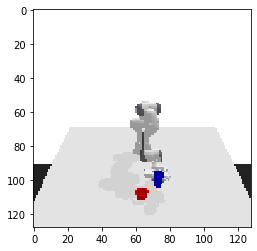

----- 9 -----
4
-----
46
-----
50
-----
12
-----
50
-----
Final distance between blue and red cup: 0.171m
visual check final frame:


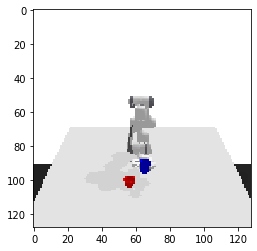

----- 7 -----
34
-----
50
-----
50
-----
17
-----
19
-----
Final distance between blue and red cup: 0.171m
visual check final frame:


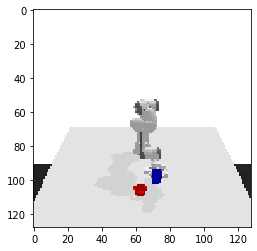

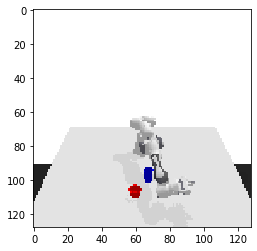

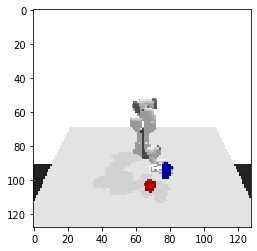

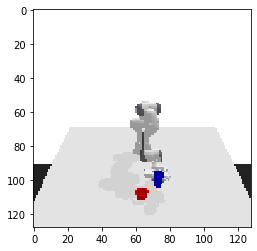

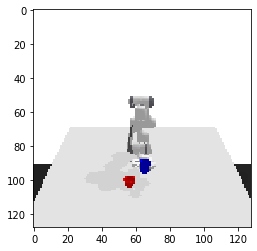

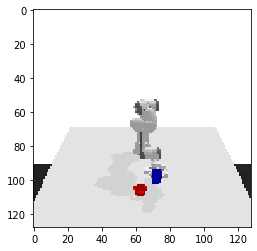

In [ ]:
redo_demos = [3,7,9,11,17,19]


i=redo_demos.pop()
while redo_demos:
    obs = env.reset()
    og_ee_pos = env.robot.get_ee_position()
    ee_position = env.robot.get_ee_position()

    obs = []

    print('-----',i,'-----')
    goal = env.sim.get_base_position("object") - np.array([0.08,0.0,0])
    goal = np.concatenate((goal[:2],[og_ee_pos[2]]))

    obs+=(approach_target(goal, from_side = True, grip = 1, precision = 0.04))

    print('-----')
    goal = np.concatenate((goal[:2],[env.sim.get_base_position("object")[2]]))
    obs+=(approach_target(goal, from_side = True, grip = 1, precision = 0.04))

    print('-----')
    goal = env.sim.get_base_position("object") + np.array([0.04,0,0.0175])
    obs+=(approach_target(goal, from_side = True, grip = 0, precision = 0.01))

    print('-----')
    goal = goal+np.array([0,0,0.25])
    obs+=(approach_target(goal, from_side = True, grip = -1, precision = 0.04))

    #print('-----')
    #goal = env.sim.get_base_position("target") 
    #obs+=(approach_target(goal, from_side = True, grip = -1))

    print('-----')
    goal = env.sim.get_base_position("target") + np.array([0,0,0.16])
    #if goal[1]>env.sim.get_base_position("object")[1]:
    #  offset = np.array([0,-0.02,0])
    #  right = False 
    #else:
    #  offset = np.array([0,0.02,0])
    #  right = True 

    right = False
    offset = np.array([0,0.12,0])

    goal+=offset
    obs+=(approach_target(goal, from_side = True, grip = -1,precision = 0.001))

    print('-----')

    # if you want to include the pouring action:
    #obs+=pour(angle_shift=math.pi/2 + math.pi/2*(0.3),right = right)
    #print('-----')
    #obs+=pour(angle_shift=math.pi/2 + math.pi/8*(0.3),right = not right)

    #count nr in red, blue or spilled:
    #_,_,_,dd=count_nr_in_tg(env)
    #print(count_nr_in_tg(env)[:3])

    final_dist_= np.sqrt(distance(env.sim.get_base_position("target"),env.sim.get_base_position("object")))
    print(f'Final distance between blue and red cup: {final_dist_:.3f}m')
    print('visual check final frame:')
    fig = plt.figure()
    plt.imshow(obs[-1].front_rgb, interpolation='nearest')
    display.display(fig)

    panda_demo = Demo(obs)
    EPISODE_FOLDER = 'episode%d'
    index = i
    panda_dataset_dir_eps = os.path.join(panda_dataset_dir, EPISODE_FOLDER % index)
    if os.path.exists(panda_dataset_dir_eps):
      !rm -rf $panda_dataset_dir_eps

    save_demo(panda_demo, panda_dataset_dir_eps)

    check_save = check_demo(panda_dataset_dir, index)
    if check_save:
      i = redo_demos.pop()

----- 19 -----
8
-----
50
-----
50
-----
12
-----
50
-----
Final distance between blue and red cup: 0.177m
visual check final frame:


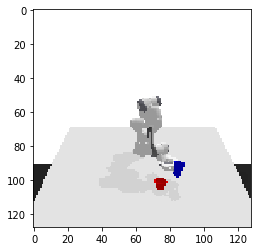

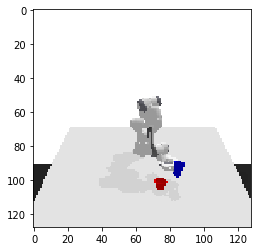

In [ ]:
redo_demos = [19]


i=redo_demos.pop()
while True:
    obs = env.reset()
    og_ee_pos = env.robot.get_ee_position()
    ee_position = env.robot.get_ee_position()

    obs = []

    print('-----',i,'-----')
    goal = env.sim.get_base_position("object") - np.array([0.08,0.0,0])
    goal = np.concatenate((goal[:2],[og_ee_pos[2]]))

    obs+=(approach_target(goal, from_side = True, grip = 1, precision = 0.04))

    print('-----')
    goal = np.concatenate((goal[:2],[env.sim.get_base_position("object")[2]]))
    obs+=(approach_target(goal, from_side = True, grip = 1, precision = 0.04))

    print('-----')
    goal = env.sim.get_base_position("object") + np.array([0.04,0,0.0175])
    obs+=(approach_target(goal, from_side = True, grip = 0, precision = 0.01))

    print('-----')
    goal = goal+np.array([0,0,0.25])
    obs+=(approach_target(goal, from_side = True, grip = -1, precision = 0.04))

    #print('-----')
    #goal = env.sim.get_base_position("target") 
    #obs+=(approach_target(goal, from_side = True, grip = -1))

    print('-----')
    goal = env.sim.get_base_position("target") + np.array([0,0,0.16])
    #if goal[1]>env.sim.get_base_position("object")[1]:
    #  offset = np.array([0,-0.02,0])
    #  right = False 
    #else:
    #  offset = np.array([0,0.02,0])
    #  right = True 

    right = False
    offset = np.array([0,0.12,0])

    goal+=offset
    obs+=(approach_target(goal, from_side = True, grip = -1,precision = 0.001))

    print('-----')

    # if you want to include the pouring action:
    #obs+=pour(angle_shift=math.pi/2 + math.pi/2*(0.3),right = right)
    #print('-----')
    #obs+=pour(angle_shift=math.pi/2 + math.pi/8*(0.3),right = not right)

    #count nr in red, blue or spilled:
    #_,_,_,dd=count_nr_in_tg(env)
    #print(count_nr_in_tg(env)[:3])

    final_dist_= np.sqrt(distance(env.sim.get_base_position("target"),env.sim.get_base_position("object")))
    print(f'Final distance between blue and red cup: {final_dist_:.3f}m')
    print('visual check final frame:')
    fig = plt.figure()
    plt.imshow(obs[-1].front_rgb, interpolation='nearest')
    display.display(fig)

    panda_demo = Demo(obs)
    EPISODE_FOLDER = 'episode%d'
    index = i
    panda_dataset_dir_eps = os.path.join(panda_dataset_dir, EPISODE_FOLDER % index)
    if os.path.exists(panda_dataset_dir_eps):
      !rm -rf $panda_dataset_dir_eps

    save_demo(panda_demo, panda_dataset_dir_eps)

    check_save = check_demo(panda_dataset_dir, index)
    if check_save:
      if redo_demos:
        i = redo_demos.pop()
      else:
        break